#### I have taken help to build the kernel from following link:
> https://www.kaggle.com/pestipeti/keras-cnn-starter

Here I am converting the images to gray scale befor training/ testing.

In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from skimage import color
from skimage import io
from skimage.transform import rescale, resize
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications import Xception
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K
from keras.models import Sequential
import tensorflow as tf
import warnings

Using TensorFlow backend.


In [5]:
import os
f=[] 
def listdirs(rootdir):
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            print(d)
            f.append(d)
            listdirs(d)
 
rootdir = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'
listdirs(rootdir)

../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca
../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_scc
../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_n


In [6]:
import pandas as pd
from pathlib import Path

image_dir_path = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_n'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df1 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df1)


image_dir_path = '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_scc'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df2 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df2)
image_dir_path ='../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df3 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df3)



                 Root    Type          Images
0     lung_image_sets  lung_n   lungn691.jpeg
1     lung_image_sets  lung_n  lungn3098.jpeg
2     lung_image_sets  lung_n  lungn4225.jpeg
3     lung_image_sets  lung_n    lungn40.jpeg
4     lung_image_sets  lung_n  lungn4213.jpeg
5     lung_image_sets  lung_n  lungn4645.jpeg
6     lung_image_sets  lung_n  lungn3468.jpeg
7     lung_image_sets  lung_n  lungn3880.jpeg
8     lung_image_sets  lung_n  lungn1406.jpeg
9     lung_image_sets  lung_n  lungn3177.jpeg
10    lung_image_sets  lung_n  lungn3072.jpeg
11    lung_image_sets  lung_n  lungn3941.jpeg
12    lung_image_sets  lung_n  lungn4422.jpeg
13    lung_image_sets  lung_n   lungn278.jpeg
14    lung_image_sets  lung_n  lungn4605.jpeg
15    lung_image_sets  lung_n  lungn1022.jpeg
16    lung_image_sets  lung_n  lungn4620.jpeg
17    lung_image_sets  lung_n  lungn2263.jpeg
18    lung_image_sets  lung_n   lungn201.jpeg
19    lung_image_sets  lung_n  lungn2232.jpeg
20    lung_image_sets  lung_n  lun

In [7]:
df = pd.concat([df1,df2,df3])
df.reset_index()

,index,Root,Type,Images
0,0,lung_image_sets,lung_n,lungn691.jpeg
1,1,lung_image_sets,lung_n,lungn3098.jpeg
2,2,lung_image_sets,lung_n,lungn4225.jpeg
3,3,lung_image_sets,lung_n,lungn40.jpeg
4,4,lung_image_sets,lung_n,lungn4213.jpeg
5,5,lung_image_sets,lung_n,lungn4645.jpeg
6,6,lung_image_sets,lung_n,lungn3468.jpeg
7,7,lung_image_sets,lung_n,lungn3880.jpeg
8,8,lung_image_sets,lung_n,lungn1406.jpeg
9,9,lung_image_sets,lung_n,lungn3177.jpeg


In [8]:
df.describe()

,Root,Type,Images
count,15000,15000,15000
unique,1,3,15000
top,lung_image_sets,lung_aca,lungscc2971.jpeg
freq,15000,5000,1


In [9]:
import os
os.makedirs('/kaggle/working/lung_n')
os.makedirs('/kaggle/working/lung_scc')
os.makedirs('/kaggle/working/lung_aca')



In [10]:
y = df.filter(['Type'])

In [11]:
y

,Type
0,lung_n
1,lung_n
2,lung_n
3,lung_n
4,lung_n
5,lung_n
6,lung_n
7,lung_n
8,lung_n
9,lung_n


In [12]:
y['Type'].values[0]

'lung_n'

In [13]:
from zipfile import ZipFile
from PIL import Image
import os
def prepareImages(data, m, dataset):
    img_size=331
    print("Preparing images")
    X_train = np.zeros((m, img_size, img_size, 1))
    count = 0
    p=0
    for index,row in df.iterrows():
        img = image.load_img(r"../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/"+row["Type"]+"/"+row["Images"])
        img_rgb = Image.open(r"../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/"+row["Type"]+"/"+row["Images"])
        img_cmyk = img_rgb.convert('CMYK')
        img_cmyk.save(r"./"+y['Type'].values[count]+"/"+"processed"+str(count)+".jpeg")
        count += 1

In [14]:
df.shape[0]

15000

In [15]:
prepareImages(df, df.shape[0], "train")

Preparing images


In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [17]:
IMAGE_SIZE = (331, 331, 3)

train_path = '../working/'

In [18]:
nasnetL = NASNetLarge(input_shape=IMAGE_SIZE, include_top=False, weights="imagenet")

343613440/343610240 [==============================] - 8s 0us/step


In [19]:
for layer in nasnetL.layers:
    layer.trainable = False

In [20]:
folders = glob('../working/*')
print(len(folders))

4


In [21]:
x = Flatten()(nasnetL.output)

In [22]:
prediction = Dense(len(folders)-1, activation='softmax')(x)
model = Model(inputs=nasnetL.input, outputs=prediction)

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

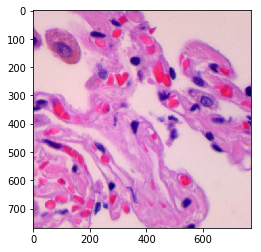

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../working/lung_n/processed582.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data = ImageDataGenerator(validation_split = 0.2,
                          rescale = 1./224,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True)

In [27]:
training_set = data.flow_from_directory(directory=r'../working/',
                                                 target_size = (331, 331),
                                                 batch_size = 64,
                                                 subset = "training",
                                                 class_mode = 'categorical')

Found 12000 images belonging to 3 classes.


In [28]:
test_set = data.flow_from_directory('../working/',
                                            target_size = (331, 331),
                                            batch_size = 64,
                                            subset = "validation",
                                            class_mode = 'categorical')

Found 3000 images belonging to 3 classes.


In [29]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
188/188 [==============================] - 712s 4s/step - loss: 4.8990 - acc: 0.6837 - val_loss: 5.8730 - val_acc: 0.6093
Epoch 2/20
188/188 [==============================] - 678s 4s/step - loss: 2.0719 - acc: 0.8618 - val_loss: 4.7073 - val_acc: 0.6950
Epoch 3/20
188/188 [==============================] - 675s 4s/step - loss: 1.6023 - acc: 0.8926 - val_loss: 4.5301 - val_acc: 0.7100
Epoch 4/20
188/188 [==============================] - 674s 4s/step - loss: 1.7344 - acc: 0.8863 - val_loss: 5.2868 - val_acc: 0.6660
Epoch 5/20
188/188 [==============================] - 674s 4s/step - loss: 1.3624 - acc: 0.9098 - val_loss: 6.0496 - val_acc: 0.6143
Epoch 6/20
188/188 [==============================] - 675s 4s/step - loss: 1.3864 - acc: 0.9084 - val_loss: 5.7897 - val_acc: 0.6330
Epoch 7/20
188/188 [==============================] - 668s 4s/step - loss: 1.2093 - acc: 0.9209 - val_loss: 6.1497 - val_acc: 0.6103
Epoch 8/20
188/188 [==============================] - 677s 4s/step - 

In [30]:
import matplotlib.pyplot as plt

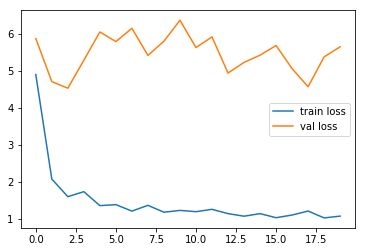

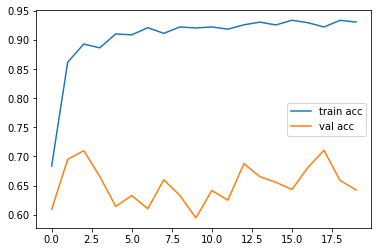

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
from tensorflow.keras.models import load_model
model.save('model_nasnetlarge.h5')

In [33]:
y_pred = model.predict(test_set)

In [34]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.3795408e-15],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.9368536e-19],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [35]:
from sklearn.metrics import classification_report

Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.14      0.20      1000
           1       0.33      0.23      0.27      1000
           2       0.34      0.62      0.44      1000

   micro avg       0.33      0.33      0.33      3000
   macro avg       0.34      0.33      0.30      3000
weighted avg       0.34      0.33      0.30      3000



In [36]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


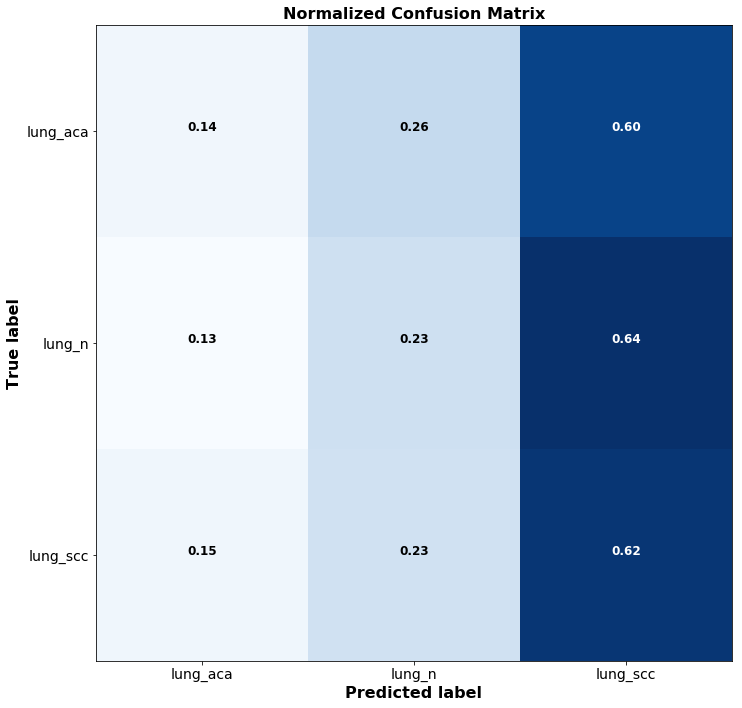

In [38]:
cnf_matrix = confusion_matrix(test_set.classes, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['lung_aca', 'lung_n', 'lung_scc'],normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()